# 1st part: classify MNIST using a simple model

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [5]:
print("number of training examples:" , x_train.shape[0])
print("number of test examples:" , x_test.shape[0])

number of training examples: 60000
number of test examples: 10000


In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

In [7]:
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


In [8]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

In [9]:
def forward(x):
    return tf.matmul(x,W) + b

In [10]:
# a sample softmax calculation on an input vector
vector = [10, 0.2, 8]
softmax = tf.nn.softmax(vector)
print("softmax calculation")
print(softmax.numpy())
print("verifying normalization")
print(tf.reduce_sum(softmax))
print("finding vector with largest value (label assignment)")
print("category", tf.argmax(softmax).numpy())

softmax calculation
[8.8075405e-01 4.8839214e-05 1.1919710e-01]
verifying normalization
tf.Tensor(1.0, shape=(), dtype=float32)
finding vector with largest value (label assignment)
category 0


In [11]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [12]:
def model(x):
    x = flatten(x)
    return activate(x)

In [13]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

138155.03

In [14]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

In [15]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss 
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )     
    return current_loss.numpy()

In [16]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )

epoch  0 batch 500 loss: 176.88257
epoch  0 batch 1000 loss: 214.80328
end of epoch  0 loss 221839.72 accuracy 0.8149167
epoch  1 batch 500 loss: 206.1276
epoch  1 batch 1000 loss: 145.16835
end of epoch  1 loss 216982.12 accuracy 0.8226333
epoch  2 batch 500 loss: 169.53117
epoch  2 batch 1000 loss: 196.36026
end of epoch  2 loss 213829.17 accuracy 0.8272167
epoch  3 batch 500 loss: 172.28514
epoch  3 batch 1000 loss: 173.96254
end of epoch  3 loss 210430.03 accuracy 0.83066666
epoch  4 batch 500 loss: 161.20569
epoch  4 batch 1000 loss: 182.20525
end of epoch  4 loss 206470.05 accuracy 0.83503336
epoch  5 batch 500 loss: 190.57175
epoch  5 batch 1000 loss: 171.30872
end of epoch  5 loss 208921.95 accuracy 0.83255
epoch  6 batch 500 loss: 238.12854
epoch  6 batch 1000 loss: 199.50337
end of epoch  6 loss 206631.19 accuracy 0.8344167
epoch  7 batch 500 loss: 201.32297
epoch  7 batch 1000 loss: 186.5648
end of epoch  7 loss 203951.27 accuracy 0.83835
epoch  8 batch 500 loss: 186.96683
e

In [17]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.84003335
test accuracy 0.8326


Text(0, 0.5, 'loss')

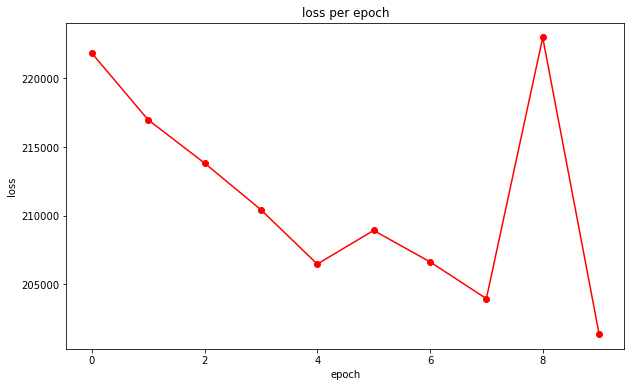

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

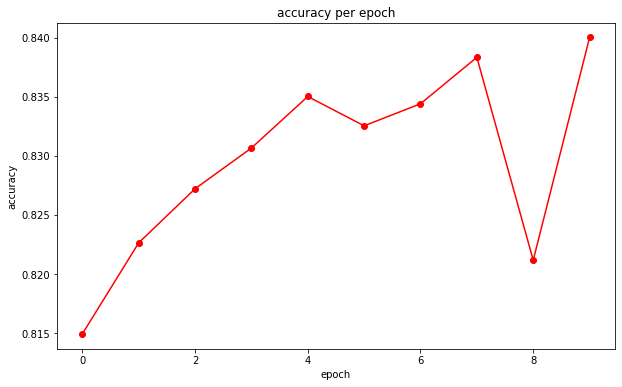

In [19]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

# 2nd part: Deep Learning applied on MNIST

In [20]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

In [21]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

In [22]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

Convolutional Layer 1

In [23]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [24]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)
#Apply ReLU activation
def h_conv1(x): return(tf.nn.relu(convolve1(x)))
#Apply the max pooling
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

Convolutional Layer 2

In [25]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [26]:
def convolve2(x): 
    return( 
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)
#Apply ReLU activation
def h_conv2(x):  return tf.nn.relu(convolve2(x))
#Apply the max pooling
def conv2(x):
    return(tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

Fully Connected Layer

In [27]:
#Flatten the second layer
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

In [28]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [29]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1
#Apply ReLU activation
def h_fc1(x): return tf.nn.relu(fcl(x))
#Dropout Layer
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

Softmax Layer

In [30]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [31]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

In [32]:
#Apply softmax activation
def y_CNN(x): return tf.nn.softmax(fc(x))

In [33]:
#Define the loss function
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
#Define the optimizer
optimizer = tf.keras.optimizers.Adam(1e-4)

In [34]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2, 
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()

In [35]:
#Define prediction
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))
#Define accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

In [36]:
#Run the model
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy)) 
            
    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 

epoch  0 batch 50 loss: 123.83234 accuracy 0.32
epoch  0 batch 100 loss: 46.46266 accuracy 0.74
epoch  0 batch 150 loss: 52.25184 accuracy 0.82
epoch  0 batch 200 loss: 22.613558 accuracy 0.92
epoch  0 batch 250 loss: 37.27877 accuracy 0.84
epoch  0 batch 300 loss: 23.09977 accuracy 0.82
epoch  0 batch 350 loss: 26.596197 accuracy 0.86
epoch  0 batch 400 loss: 20.520302 accuracy 0.9
epoch  0 batch 450 loss: 20.980137 accuracy 0.86
epoch  0 batch 500 loss: 17.23739 accuracy 0.9
epoch  0 batch 550 loss: 13.207546 accuracy 0.86
epoch  0 batch 600 loss: 20.765224 accuracy 0.88
epoch  0 batch 650 loss: 17.324043 accuracy 0.84
epoch  0 batch 700 loss: 6.065503 accuracy 0.94
epoch  0 batch 750 loss: 25.01963 accuracy 0.82
epoch  0 batch 800 loss: 12.499945 accuracy 0.88
epoch  0 batch 850 loss: 14.668715 accuracy 0.92
epoch  0 batch 900 loss: 17.815977 accuracy 0.92
epoch  0 batch 950 loss: 17.153378 accuracy 0.88
epoch  0 batch 1000 loss: 7.9651012 accuracy 0.94
epoch  0 batch 1050 loss: 7.0

In [37]:
#Evaluate model
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        #accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) ) 
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))  

batch 100 accuracy 0.94
batch 200 accuracy 1.0
batch 300 accuracy 0.96
batch 400 accuracy 0.96
batch 500 accuracy 0.94
batch 600 accuracy 0.92
batch 700 accuracy 0.98
batch 800 accuracy 0.96
batch 900 accuracy 0.94
batch 1000 accuracy 0.92
batch 1100 accuracy 0.88
batch 1200 accuracy 1.0
accuracy of entire set 0.9374
